<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_ml/ml11_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image

# matplotlib.image 모듈

In [2]:
img = image.imread('spring.jpg')

`matplotlib.image.imread()`:

*   이미지 파일 읽어서 numpy.ndarray를 생성
*   흑백 이미지: (height, width) shape의 2차원 배열
*   RGB 형식 이미지: (height, width, 3) shape의 3차원 배열
*   RGBA 형식 이미지: (height, width, 4) shape의 3차원 배열

In [3]:
type(img)

numpy.ndarray

In [4]:
img.shape  #> (height, width, 3)

(1200, 2000, 3)

In [5]:
img[:, :, 0]
# 이미지의 Red 값: 0 ~ 255 (8 bits)

array([[198, 195, 220, ..., 199, 191, 128],
       [205, 214, 192, ..., 202, 159, 168],
       [189, 192, 191, ..., 188, 174, 161],
       ...,
       [ 19,  17,  19, ...,  84,  94,  95],
       [ 25,  17,  21, ...,  81,  92,  90],
       [ 29,  12,  13, ...,  80,  95,  90]], dtype=uint8)

`matplotlib.pyplot.imshow()':

*   numpy.ndarray로 변환된 이미지 (배열)을 시각화

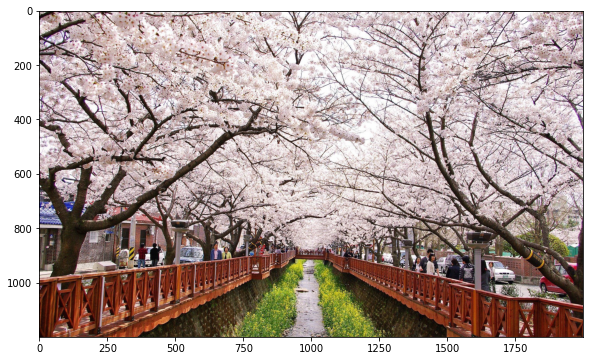

In [10]:
plt.figure(figsize=(10, 6))  # figsize=(width, height)
plt.imshow(img)
# plt.axis('off')
plt.show()

`matplotlib.pyplot.imsave(file, array)`:

*   배열 array를 이미지 파일 file로 저장.

In [11]:
plt.imsave('spring_copy.jpg', img)